#Intro to PyTorch
In this lab, we will introduce one of the most important deep learning frameworks: [PyTorch](https://pytorch.org/). We will go through the most basic concepts first, to finally see how we can use different datasets, write our own training and testing functions and some other important stuff.

##Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to [NumPy’s](https://numpy.org/) ndarrays, except that tensors can run on GPUs or other hardware accelerators. Tensors
are also optimized for automatic differentiation. If you are familiar with `ndarrays`, you’ll be right at home with the Tensor API.

In [ ]:
import torch
import numpy as np

###Initializing a tensor
Tensors can be initialized in various ways. Take a look at the following examples:

**Directly from data**

Tensors can be created directly from data. The data type is automatically inferred.

In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(x_data)

**From a NumPy array**

Tensors can be created from NumPy arrays (and vice versa):

In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(x_np)

**From another tensor:**

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.

In [ ]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

**With random or constant values:**

``shape`` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.

In [ ]:
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

###Attributes of a Tensor

Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

###Operations on Tensors

Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing,
indexing, slicing), sampling and more are
comprehensively described [here](https://pytorch.org/docs/stable/torch.html).

Each of these operations can be run on the GPU (at typically higher speeds than on a
CPU). If you’re using Colab, allocate a GPU by going to Runtime > Change runtime type > GPU.

**Note:** you may have to execute previous cells again (`import` cells specially), since changing the runtime restarts the runtime.

By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using
``.to`` method (after checking for GPU availability). Keep in mind that copying large tensors
across devices can be expensive in terms of time and memory!

In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Try out some of the operations from the list.
If you're familiar with the NumPy API, you'll find the Tensor API a breeze to use.

**Standard numpy-like indexing and slicing:**

In [ ]:
tensor = torch.ones(4, 4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

**Joining tensors** You can use ``torch.cat`` to concatenate a sequence of tensors along a given dimension.
See also [`torch.stack`](https://pytorch.org/docs/stable/generated/torch.stack.html),
another tensor joining op that is subtly different from ``torch.cat``.

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

A typical tensor joining operation is [`torch.vstack`](https://pytorch.org/docs/stable/generated/torch.vstack.html), which stacks tensors in sequence vertically, i.e. row wise.

In [ ]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
c = torch.vstack((a, b))
print(f'c: \n {c}')

a = torch.tensor([[1],[2],[3]])
b = torch.tensor([[4],[5],[6]])
c = torch.vstack((a,b))
print(f'c: \n {c}')

**Arithmetic operations**

In [ ]:
tensor = torch.ones(4, 4)
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)

print(f'y1: \n {y1} \n')
print(f'y2: \n {y2} \n')
print(f'y3: \n {y3} \n')


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

print(f'z1: \n {z1} \n')
print(f'z2: \n {z2} \n')
print(f'z3: \n {z3} \n')

**Single-element tensors** If you have a one-element tensor, for example by aggregating all
values of a tensor into one value, you can convert it to a Python
numerical value using ``item()``:

In [ ]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

**Reshaping operations** Tensors have a given shape, but we can change it if needed. Typical operations to reshape tensors are `torch.squeeze` and `torch.unsqueeze`. The first one returns a tensor with all the dimensions of input of size 1 removed (we use this operation in this tutorial when visualizing images). Let's see an example:

In [ ]:
x = torch.zeros(2, 1, 2, 1, 2)
print(f'Shape of x: {x.size()}')

y = torch.squeeze(x)
print(f'Shape of y: {y.size()}')

y = torch.squeeze(x, 0) # We can specify a dimension to squeeze; if given, the input will be squeezed only in this dimension
print(f'Shape of y after squeezing only dimension 0: {y.size()}')

y = torch.squeeze(x, 1)
print(f'Shape of y after squeezing only dimension 1: {y.size()}')

On the other hand, `torch.unsqueeze` returns a new tensor with a dimension of size one inserted at the specified position.



In [ ]:
x = torch.tensor([1, 2, 3, 4])
print(f'Shape of x: {x.size()}')
y = torch.unsqueeze(x, 0)
print(f'Shape of y (unsqueeze dimension 0): {y.size()}')

y = torch.unsqueeze(x, 1)
print(f'Shape of y (unsqueeze dimension 1): {y.size()}')

**Broadcasting** Let's see some magic now:

In [ ]:
a = torch.tensor([[1, 2, 3]])
print(f'Shape of a: {a.size()}')
b = torch.tensor([[4], [5], [6]])
print(f'Shape of b: {b.size()}')

c = a+b
print(f'c: \n {c}')

Is that even possible? We added a tensor of shape (1, 3) to a tensor of shape (3, 1) and we obtained a tensor of shape (3, 3). How did Pytorch do such a thing? It is called **broadcasting** and allows performing arithmetic operations easily in certain conditions (Numpy also supports broadcasting in the same way). To know whether two tensors are broadcastable, we have to check the following rules for all dimensions:

1.   Are they equal to each other?
2.   Is one of them 1?

So in our previous example, starting from the last dimension we have that: `a` tensor's last dimension is of size 3, whereas `b` tensor's last dimension is of size 1. Are they compatible? Yes! For the first dimension, we have sizes 3 and 1 respectively, so they are also compatible. As all the dimensions are compatible, `a` and `b` are broadcastable. The shape of a given arithmetic operation will be the maximum size of all dimensions, i.e. (3, 3).

What Pytorch does under the hood is to broadcast each tensor to be of shape (3, 3) first. Thus, `a` tensor is converted to a new (3, 3) tensor such that:

````
Tensor
[[1, 2, 3],
 [1, 2, 3],
 [1, 2, 3]]
````
Similarly, `b` is broadcasted:
````
Tensor
[[4, 4, 4],
 [5, 5, 5],
 [6, 6, 6]]
````
Afterwards, the element-wise sum is calculated.

**In-place operations**
Operations that store the result into the operand are called in-place. They are denoted by a ``_`` suffix.
For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.

In [ ]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

**Note**

In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss of history. Hence, their use is discouraged.

**Bridge with NumPy**

Tensors on the CPU and NumPy arrays can share their underlying memory
locations, and changing one will change	the other.

Tensor to NumPy array

In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n} type: {type(n)}")

A change in the tensor reflects in the NumPy array.

In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

NumPy array to Tensor

In [ ]:
n = np.ones(5)
t = torch.from_numpy(n)

Changes in the NumPy array reflects in the tensor.

In [ ]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

##Autograd
When training neural networks, the most frequently used algorithm is
**back propagation**. In this algorithm, parameters (model weights) are
adjusted according to the **gradient** of the loss function with respect
to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation engine
called ``torch.autograd``. It supports automatic computation of gradient for any
computational graph.

Consider the simplest one-layer neural network, with input ``x``,
parameters ``w`` and ``b``, and some loss function. It can be defined in
PyTorch in the following manner:

In [ ]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

###Tensors, Functions and Computational graph

This code defines the following **computational graph**:

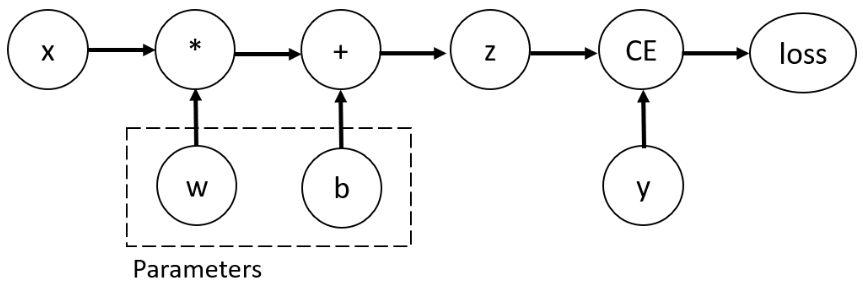

In this network, ``w`` and ``b`` are **parameters**, which we need to
optimize. Thus, we need to be able to compute the gradients of loss
function with respect to those variables. In order to do that, we set
the ``requires_grad`` property of those tensors.

**Note**

You can set the value of `requires_grad` when creating a tensor, or later by using `x.requires_grad_(True)` method.

A function that we apply to tensors to construct a computational graph is
in fact an object of class `Function`. This object knows how to
compute the function in the *forward* direction, and also how to compute
its derivative during the *backward propagation* step. A reference to
the backward propagation function is stored in `grad_fn` property of a
tensor. You can find more information of `Function` [in the
documentation](https://pytorch.org/docs/stable/autograd.html#function).

In [ ]:
print('Gradient function for z =',z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

###Computing Gradients

To optimize weights of parameters in the neural network, we need to
compute the derivatives of our loss function with respect to parameters,
namely, we need $\frac{\partial loss}{\partial w}$ and
$\frac{\partial loss}{\partial b}$ under some fixed values of
``x`` and ``y``. To compute those derivatives, we call
``loss.backward()``, and then retrieve the values from ``w.grad`` and
``b.grad``:

In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

**Note**

We can only obtain the `grad` properties for the leaf nodes of the computational graph, which have `requires_grad` property set to `True`. For all other nodes in our graph, gradients will not be available.

We can only perform gradient calculations using `backward` once on a given graph, for performance reasons. If we need to do several `backward` calls on the same graph, we need to pass `retain_graph=True` to the `backward` call.

###Disabling Gradient Tracking

By default, all tensors with ``requires_grad=True`` are tracking their
computational history and support gradient computation. However, there
are some cases when we do not need to do that, for example, when we have
trained the model and just want to apply it to some input data, i.e. we
only want to do *forward* computations through the network. We can stop
tracking computations by surrounding our computation code with
``torch.no_grad()`` block:

In [ ]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

Another way to achieve the same result is to use the ``detach()`` method
on the tensor:

In [ ]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

There are reasons you might want to disable gradient tracking:
  - To mark some parameters in your neural network as **frozen parameters**. This is a very common scenario for [finetuning a pretrained network](https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html) (we will see this later in the course).  
  - To **speed up computations** when you are only doing forward pass, because computations on tensors that do not track gradients would be more efficient.

###More on Computational Graphs

Conceptually, autograd keeps a record of data (tensors) and all executed
operations (along with the resulting new tensors) in a directed acyclic
graph (DAG) consisting of [Function](https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function) objects. In this DAG, leaves are the input tensors, roots are the output tensors. By tracing this graph from roots to leaves, you can automatically compute the gradients using the chain rule.

In a forward pass, autograd does two things simultaneously:

- run the requested operation to compute a resulting tensor
- maintain the operation’s *gradient function* in the DAG.

The backward pass kicks off when ``.backward()`` is called on the DAG
root. ``autograd`` then:

- computes the gradients from each ``.grad_fn``,
- accumulates them in the respective tensor’s ``.grad`` attribute
- using the chain rule, propagates all the way to the leaf tensors.

**Note**

**DAGs are dynamic in PyTorch**. An important thing to note is that the graph is recreated from scratch; after each ``.backward()`` call, autograd starts populating a new graph. This is exactly what allows you to use control flow statements in your model; you can change the shape, size and operations at every iteration if needed.

##Datasets and Dataloaders
Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code
to be decoupled from our model training code for better readability and modularity.
PyTorch provides two data primitives: ``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``
that allow you to use pre-loaded datasets as well as your own data.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset`` to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that
subclass ``torch.utils.data.Dataset`` and implement functions specific to the particular data.
They can be used to prototype and benchmark your model. You can find them
here: [Image Datasets](https://pytorch.org/vision/stable/datasets.html),
[Text Datasets](https://pytorch.org/text/stable/datasets.html), and
[Audio Datasets](https://pytorch.org/audio/stable/datasets.html).

###Loading a Dataset

Here is an example of how to load the [Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/) dataset from TorchVision.
Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples.
Each example comprises a $28 \times 28$ grayscale image and an associated label from one of 10 classes.

We load the [FashionMNIST Dataset](https://pytorch.org/vision/stable/datasets.html#fashion-mnist) with the following parameters:
 - ``root`` is the path where the train/test data is stored,
 - ``train`` specifies training or test dataset,
 - ``download=True`` downloads the data from the internet if it's not available at ``root``.
 - ``transform`` and ``target_transform`` specify the feature and label transformations

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

###Iterating and Visualizing the Dataset

We can index `Datasets` manually like a list: `training_data[index]`.
We use `matplotlib` to visualize some samples in our training data.

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

###Creating a Custom Dataset for your files

A custom Dataset class must implement three functions: `__init__`, `__len__`, and `__getitem__`.
Take a look at this implementation; the FashionMNIST images are stored
in a directory `img_dir`, and their labels are stored separately in a CSV file `annotations_file`.

In the next sections, we'll break down what's happening in each of these functions.

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

**`__init__`**

The `__init__` function is run once when instantiating the `Dataset` object. We initialize the directory containing the images, the annotations file, and both transforms (covered in more detail in the next section).

The `labels.csv` file looks like:

    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9

**`__len__`**

The `__len__` function returns the number of samples in our dataset.

**`__getitem__`**

The `__getitem__` function loads and returns a sample from the dataset at the given index `idx`.
Based on the index, it identifies the image's location on disk, converts that to a tensor using `read_image`, retrieves the corresponding label from the csv data in `self.img_labels`, calls the transform functions on them (if applicable), and returns the tensor image and corresponding label in a tuple.

###Preparing your data for training with DataLoaders

The `Dataset` retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to
pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting, and use Python's `multiprocessing` to
speed up data retrieval.

`DataLoader` is an iterable that abstracts this complexity for us in an easy API.

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False) # You don't have to shuffle the test set. It's just for evaluation

###Iterate through the DataLoader

We have loaded that dataset into the `Dataloader` and can iterate through the dataset as needed. Each iteration below returns a batch of `train_features` and `train_labels` (containing `batch_size=64` features and labels respectively).
Because we specified `shuffle=True`, after we iterate over all batches the data is shuffled (for finer-grained control over the data loading order, take a look at [Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler)).

In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

##Transforms
Data does not always come in its final processed form that is required for
training machine learning algorithms. We use **transforms** to perform some
manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters -`transform` to modify the features and `target_transform` to modify the labels - that accept callables containing the transformation logic. The [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html) module offers several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are integers.
For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors. To make these transformations, we use `ToTensor` and `Lambda`.

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

###`ToTensor()`

[ToTensor](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor) converts a PIL image or NumPy `ndarray` into a `FloatTensor` and scales the image's pixel intensity values in the range $[0., 1.]$

###`Lambda Transforms`

Lambda transforms apply any user-defined lambda function. Here, we define a function to turn the integer into a one-hot encoded tensor. It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls
[scatter_](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.scatter_)  which assigns a `value=1` on the index as given by the label `y`.

##Build your neural network
Neural networks comprise of layers/modules that perform operations on data.
The [torch.nn](https://pytorch.org/docs/stable/nn.html) namespace provides all the building blocks you need to build your own neural network. Every module in PyTorch subclasses the [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). A neural network is a module itself that consists of other modules (layers). This nested structure allows for building and managing complex architectures easily.

In the following sections, we'll build a neural network to classify images in the FashionMNIST dataset.

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

###Get Device for Training

We want to be able to train our model on a hardware accelerator like the GPU,
if it is available. Let's check to see if [torch.cuda](https://pytorch.org/docs/stable/notes/cuda.html) is available, else we continue to use the CPU.

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

###Define a layer
One of the nice things of PyTorch is that we can define our own layers and architectures following the `nn.Module` API. We only have to specify the behaviour for the forward pass, since the backward pass is automatically calculated by `torch.autograd`.

Let's define our own linear layer to build a multi-layer perceptron.

**EXERCISE:** Implement the initialization of a linear layer following the He or Kaiming initialization approach (see slides). Hint: use `torch.randn` to generate a random tensor from a normal distribution $N(0, 1)$. Initialize the bias as a vector of zeros.

**EXERCISE:** Implement the forward pass of a linear layer. Remember $z = W x + b$, where $W$ is the weight matrix, $x$ the input and $b$ the bias vector of the layer.

In [ ]:
import math
class MyLinearLayer(nn.Module):
    """ Custom Linear layer """
    def __init__(self, size_in, size_out):
        # NOTE: This is the constructor of the class, so it will be executed only once.
        # We declare our variables here and initialize the parameters of the layer
        super().__init__()
        self.size_in, self.size_out = size_in, size_out

        ### WRITE YOUR CODE HERE ### (~4 lines)
        # TODO: Implement He or Kaiming initialization for weights; init bias with zeros

        ########################

        self.weights = nn.Parameter(weights)
        self.bias = nn.Parameter(bias)


    def forward(self, x):
      # NOTE: This is the function we will call in each forward pass of neural network
      # We will implement here the transfer function of a linear layer
      ### WRITE YOUR CODE HERE ### (~2 lines)

      ########################
      return z

As can be seen, we use `nn.Parameter()` for the weights and biases of our linear layer. This is very important. Parameters are Tensor subclasses, that have a very special property when used with `Module` s - when they’re assigned as Module attributes they are automatically added to the list of its parameters, and will appear e.g. in `parameters()` iterator. Assigning a Tensor doesn’t have such effect. This is because one might want to cache some temporary state in the model. If there was no such class as `Parameter`, these temporaries would get registered too.

We will also define our own ReLU activation function.

**EXERCISE:** Implement the forward pass of a ReLU activation function. Remember $a = max\{0, x\}$, where $x$ is the input tensor. Hint: have a look at `torch.clamp()` function.

In [ ]:
class MyRelu(nn.Module):
  """ Custom Relu activation function"""
  def __init__(self):
    super().__init__()

  def forward(self, x):
    ### WRITE YOUR CODE HERE ### (~1 line)

    ########################
    #return x.clamp(min=0)
    return a


We define our neural network by subclassing again `nn.Module`, and initialize the neural network layers in `__init__`. Every `nn.Module` subclass implements the operations on input data in the `forward` method.

In [ ]:
class MyMLP(nn.Module):
    def __init__(self):
        super(MyMLP, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            MyLinearLayer(28*28, 512),
            MyRelu(),
            MyLinearLayer(512, 512),
            MyRelu(),
            MyLinearLayer(512, 10),
            MyRelu()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

We create an instance of `MyMLP`, and move it to the `device`, and print its structure.

In [ ]:
model = MyMLP().to(device)
print(model)

To use the model, we pass it the input data. This executes the model's `forward`, along with some [background operations](https://github.com/pytorch/pytorch/blob/270111b7b611d174967ed204776985cefca9c144/torch/nn/modules/module.py#L866). Do not call `model.forward()` directly!

Calling the model on the input returns a 10-dimensional tensor with raw predicted values for each class (logits). We get the prediction probabilities by passing it through an instance of the `nn.Softmax` module.

In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

###Model Layers

Let's break down the layers in the FashionMNIST model. To illustrate it, we
will take a sample minibatch of 3 images of size $28 \times 28$ and see what happens to it as we pass it through the network.

In [ ]:
input_image = torch.rand(3,28,28)
print(input_image.size())

`nn.Flatten`

We initialize the [nn.Flatten](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) layer to convert each 2D $28 \times 28$ image into a contiguous array of 784 pixel values (the minibatch dimension (at dim=0) is maintained).

In [ ]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

`MyLinearLayer`

The `MyLinearLayer` is a module that applies a linear transformation on the input using its stored weights and biases.

In [ ]:
layer1 = MyLinearLayer(size_in=28*28, size_out=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

`MyRelu`

Non-linear activations are what create the complex mappings between the model's inputs and outputs. They are applied after linear transformations to introduce *nonlinearity*, helping neural networks learn a wide variety of phenomena.

In [ ]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = MyRelu()(hidden1)
print(f"After ReLU: {hidden1}")

`nn.Sequential`

[nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can use sequential containers to put together a quick network like `seq_modules`.

In [ ]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    MyRelu(),
    MyLinearLayer(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)
print(f'logits: {logits}')

`nn.Softmax`

The last linear layer of the neural network returns `logits` - raw values in $[-\infty, \infty]$ - which are passed to the [nn.Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) module. The logits are scaled to values $[0, 1]$ representing the model's predicted probabilities for each class. `dim` parameter indicates the dimension along
which the values must sum to 1.

In [ ]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
print(f'pred_probab: {pred_probab}')

###Model Parameters

Many layers inside a neural network are *parameterized*, i.e. have associated weights and biases that are optimized during training. Subclassing `nn.Module` automatically tracks all fields defined inside your model object, and makes all parameters accessible using your model's `parameters()` or `named_parameters()` methods.

In this example, we iterate over each parameter, and print its size and a preview of its values.

In [ ]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

##Training and evaluating the neural network
Now that we have a model and data it's time to train, validate and test our model by optimizing its parameters on our data. Training a model is an iterative process; in each iteration the model makes a guess about the output, calculates the error in its guess (*loss*), collects the derivatives of the error with respect to its parameters, and **optimizes** these parameters using gradient descent.

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

# For reproducibility, see note below
torch.manual_seed(0)

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

model = MyMLP()

**Note on reproducibility:**

There are several random factors involved in the training process of a neural network, such as weight initialization, mini-batch creation, regularization techniques (not used here)... this makes training not reproducible in general. For those reasons, it is common to fix a seed for the random number generator functions. In this case, we only fix the torch seed, but you may need to fix more seeds (click [here](https://pytorch.org/docs/stable/notes/randomness.html) for more detailed explanations).

This specific set-up has a huge variability due to randomness. You can comment out the line `torch.manual_seed(0)` and run this cell and the following ones to execute the experiment again. If you do so various times, you will see very different results. In our experiments, we have observed test accuracies between 50 and 80%, with the same model and hyperparameters. You should be able to justify those performance differences, so the question for you is: **why are we obtaining such differences among different executions when the model and the hyperparameters are always the same?**

###Hyperparameters

Hyperparameters are adjustable parameters that let you control the model optimization process. Different hyperparameter values can impact model training and convergence rates.

We define the following hyperparameters for training:
 - **Number of Epochs** - the number times to iterate over the dataset
 - **Batch Size** - the number of data samples propagated through the network before the parameters are updated
 - **Learning Rate** - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.

In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

###Optimization Loop

Once we set our hyperparameters, we can then train and optimize our model with an optimization loop. Each
iteration of the optimization loop is called an **epoch**.

Each epoch consists of two main parts:
 - **The Train Loop** - iterate over the training dataset and try to converge to optimal parameters.
 - **The Validation/Test Loop** - iterate over the test dataset to check if model performance is improving.

Let's briefly familiarize ourselves with some of the concepts used in the training loop.

**Loss Function**

When presented with some training data, our untrained network is likely not to give the correct answer. **Loss function** measures the degree of dissimilarity of obtained result to the target value, and it is the loss function that we want to minimize during training. To calculate the loss we make a prediction using the inputs of our given data sample and compare it against the true data label value.

Common loss functions include [nn.MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) (Mean Square Error) for regression tasks, and [nn.NLLLoss](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss) (Negative Log Likelihood) for classification. [nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) combines `nn.LogSoftmax` and `nn.NLLLoss`.

We pass our model's output logits to `nn.CrossEntropyLoss`, which will normalize the logits and compute the prediction error.

In [ ]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

**Optimizer**

Optimization is the process of adjusting model parameters to reduce model error in each training step. **Optimization algorithms** define how this process is performed (in this example we use Mini-batch Gradient Descent).
All optimization logic is encapsulated in  the `optimizer` object. Here, we use the SGD optimizer; additionally, there are many [different optimizers](https://pytorch.org/docs/stable/optim.html) available in PyTorch such as ADAM and RMSProp, that work better for different kinds of models and data.

We initialize the optimizer by registering the model's parameters that need to be trained, and passing in the learning rate hyperparameter.

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Inside the training loop, optimization happens in three steps:
 * Call `optimizer.zero_grad()` to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
 * Backpropagate the prediction loss with a call to `loss.backward()`. PyTorch deposits the gradients of the loss w.r.t. each parameter.
 * Once we have our gradients, we call `optimizer.step()` to adjust the parameters by the gradients collected in the backward pass.  

###Full Implementation

We define `train_loop` that loops over our optimization code, and `test_loop` that evaluates the model's performance against our test data.

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Store loss and accuracy
        train_loss += loss.item()
        train_acc += (pred.argmax(1) == y).type(torch.float).sum().item()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    train_loss /= num_batches
    train_acc /= size
    return train_loss, train_acc


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, test_acc = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            test_acc += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    test_acc /= size
    print(f"Test Error: \n Accuracy: {(100*test_acc):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss, test_acc

We initialize the loss function and optimizer, and pass it to `train_loop` and `test_loop`. Feel free to increase the number of epochs to track the model's improving performance.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
train_losses, train_accuracies, test_losses, test_accuracies = [], [], [], []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss, train_acc = train_loop(train_dataloader, model, loss_fn, optimizer)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_loss, test_acc = test_loop(test_dataloader, model, loss_fn)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)
print("Done!")

Notice that we stored the loss and accuracy values for each epoch, both for training and test data. We did so to visualize learning curves. Here we have the learning curves for loss:

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), train_losses, color='blue', label='train')
plt.plot(range(epochs), test_losses, color='red', label='test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()

And here for accuracy:

In [ ]:
plt.plot(range(epochs), train_accuracies, color='blue', label='train')
plt.plot(range(epochs), test_accuracies, color='red', label='test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='upper left')
plt.show()

##Save and load the model
In this section we will look at how to persist model state with saving, loading and running model predictions.

In [ ]:
import torch
import torch.onnx as onnx
import torchvision.models as models

###Saving and Loading Model Weights

PyTorch models store the learned parameters in an internal
state dictionary, called `state_dict`. These can be persisted via the `torch.save` method. In this example, we will download a popular convolutional neural network called VGG16 (we will see it in the next theoretical sessions) and store its weights:

In [ ]:
model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), 'model_weights.pth')

Check the file explorer on your left menu to see whether you have a new file named "model_weights.pth".

To load model weights, you need to create an instance of the same model first, and then load the parameters using `load_state_dict()` method.

In [ ]:
model = models.vgg16() # we do not specify pretrained=True, i.e. do not load default weights
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

**Note**

Be sure to call `model.eval()` method before inferencing to set the dropout and batch normalization layers to evaluation mode. Failing to do this will yield inconsistent inference results.

###Saving and Loading Models with Shapes

When loading model weights, we needed to instantiate the model class first, because the class defines the structure of a network. We might want to save the structure of this class together with the model, in which case we can pass `model` (and not `model.state_dict()`) to the saving function:

In [ ]:
torch.save(model, 'model.pth')

Check again the file explorer. You should have a new file called "model.pth".

We can then load the model like this:

In [ ]:
model = torch.load('model.pth')

**Note**

This approach uses Python [pickle](https://docs.python.org/3/library/pickle.html) module when serializing the model, thus it relies on the actual class definition to be available when loading the model.

###Exporting Model to ONNX

PyTorch also has native ONNX export support. Given the dynamic nature of the
PyTorch execution graph, however, the export process must traverse the execution graph to produce a persisted ONNX model. For this reason, a
test variable of the appropriate size should be passed in to the
export routine (in our case, we will create a dummy zero tensor of the correct size):

In [ ]:
input_image = torch.zeros((1,3,224,224))
onnx.export(model, input_image, 'model.onnx')

There are a lot of things you can do with ONNX model, including running inference on different platforms and in different programming languages. For more details, we recommend visiting [ONNX tutorial](https://github.com/onnx/tutorials).